<img align="right" width="240" height="240" src="img/HS_Mu__nchen_Logo.png"/>

<style>
p.small {
  line-height: 1;
}
</style>
<body>
    
<p class="small"> <b>Geoinformatics | Course Remote Sensing (1)</b><br> <small>Schmitt | Ulloa</small><br> <small>Summer Semester 2020</small><br></p>

<h1>Practice 3: Creation of training areas</h1>

<h2>Overview</h2>

<p><b>Objective:</b> Creation of training polygons to train a supervised classification model<p/>

<p><b>Data:</b> For this practice, use the following files: </p>
<ul>
    <li> Vector file: Shapefile (AOIs.shp, id_1.shp, id_2.shp, id_3.shp and associated files)</li> 
    <li> Raster file: S2A_L2A_T32UPU_rasterstack.tif, S2A_L2A_T32UPU_TCI.tif</li>
    <li> Reference data: DOP20 Ortophotos (id_1.tif, id_2.tif, id_3.tif)</li>
</ul>

<p><b>Tasks:</b> Create training polygons for the following classes:<p/> 

<ul>
    <li> Water</li> 
    <li> Forest: conifers or deciduous</li> 
    <li> Grassland</li> 
    <li> Agriculture</li> 
    <li> Urban</li> 
</ul>

<p>Use the assigned AOI as a working area, and the ortophotos as reference data</p>

<h2>Procedure</h2>

<h3>Load raster and vector files</h3>

<p>1. Load the rasters "S2A_L2A_T32UPU_rasterstack.tif" and "S2A_L2A_T32UPU_TCI.tif" on QGIS. What are the differences of both files in terms of number of bands, pixel size, pixel resolution, and pixel values?</p>

<p>2. For this practice you will work with a Sentinel 2 Bottom of Atmosphere product. To which processing level corresponds this?</p>

<p>3. Open the ortophoto provided for your area. Do you notice the difference with the Sentinel 2 image? What is the spatial resolution of this image? </p>

<p>4. Finally, load the shapefile corresponding to your working area (i.e. id_1.shp, id_2.shp, id_3.shp). If you want to have an overview of all the AOIs at once, you can load the shapefile AOIs.shp. Explore the properties of the shapefiles and under <code>Right clik > Properties > Symbology > Simple fill</code>, change the filling of your shapefile to transparent. Change the color of the border of your shapefile, and if you want, also increase the thickness.</p>
    
<img src="img/img_p3_shapefilesetting.png" width="700"/>

<p>Your workspace should look something like this:</p> 

<img src="img/img_p3_overviewqgis.png" width="700"/>

<h3>Explore RGB and false color compositions</h3>

<p>5. In order to be able to apreciate different features on a Sentinel-2 image, you can play around with bands combinations. In order to see an image, you have to assing all the bands of a Rasterstack into one of the three visualizations channels: Red, Green, Blue. Given the fact, that every element or feature from the landscape emits reflectance at different wavelengts, you can change the band for every RGB channel and be able to see these elements in different colors.</p> 

<img src="img/img_p3_s2bands.png" width="700"/> 

<p>Right click on S2A_L2A_T32UPU_rasterstack.tif, <code>Properties > Symbology</code>. Choose the following S2 band combination for all the channels:  Red = Band 4, Green = Band 3, Blue = Band 2. If for creating the Rasterstack the Sentinel bands 2, 3, 4, 8 (BLUE, GREEN, RED, NIR) were chosen to fill the 1, 2, 3, 4 positions, can you tell which is the real band combination here chosen? For more information, visit this <a href= "https://www.sentinel-hub.com/eoproducts/false-color">source.</a></p> 

<img src="img/img_p3_falsecolor.png" width="700"/>  

<p>6. Which features from the landscape are easier to see with this band combination?</p>

<p>7. Now change the visualization to True Color. Use the following bands: R[Band 1], G[Band 2], B[Band 3]. Which Sentinel-2 bands are actually being used here? For more information, visit this <a href= "https://www.sentinel-hub.com/eoproducts/true-color-1">source.</a></p> 

<p>8. Play around with the bands combinations. Which band combination allows you to distinguish urban areas better? Which band combination allows you to recognize healthy vegetation? Why do agricultural plots have differents colors on each band combination?</p>

<h3>True and false color composite in Python</h3>

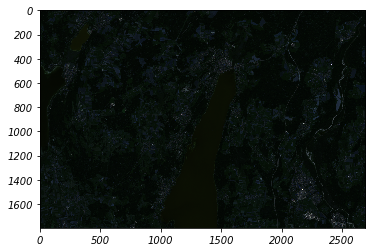

In [7]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file:
src = r"C:\Users\ulloa-to\PythonProjects\practices_fe1_ss2020\scripts\data\p3"
s2_stack = rasterio.open(os.path.join(src, "boa_sentinel2\S2A_L2A_T32UPU_rasterstack.tif"))

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
blue = s2_stack.read(1)
green = s2_stack.read(2)
red = s2_stack.read(3)
nir = s2_stack.read(4)

# Normalize band DN
blue_norm = normalize(blue)
green_norm = normalize(green)
red_norm = normalize(red)
nir_norm = normalize(nir)

# Stack bands
truecomp = np.dstack((blue_norm, green_norm, red_norm))

# View the true color composite
plt.imshow(truecomp)

<p>9. Using np.stack() create a false color composite called "falsecomp" with bands NIR, RED, and GREEN.</p>

<h3>Create training vectors</h3>

<p>Students are divided in 3 groups. Each group works with one AOI subarea. Load the shapefile id_1.shp, id_2.shp, id_3.shp correspondingly. <code>Right click > Zoom to Layer</code> and you will zoom into your working area.</p>

<p>Create polygons for every class you see on the image. Click on <code>Layer > Create Layer > New Shapefile Layer</code>. A new window opens and you can define the attributes of the shapefile to create. Define name (for example, training_polygons.shp), geometry type (polygon), check that the CRS is the same as the one from raster file, and add a second attribute on the <code>New Field</code> section. This new attribute is called "landclass". Click <code>OK</code>.</p>

<img src="img/img_p3_attributetable.png" width="400"/> 

<p>For a start, create a shapefile for the landclass "deciduous_forest". Using the Ortophotos as a source of help, create a polygon that fits into a deciduous forest (Laubwald) area. Activate the shapefile by selecting it and then press <code>Layer > Toggle Editing</code>. After this, the tool <code>Add Polygon Feature</code> gets activated. You can find this tool under <code>Edit > Add Polygon Feature</code>.Create 5-10 polygons for that class. Afterwards, create polygons for the other classes as indicated in the Practice Overview. <b>Save your results by clicking on the <code>Toggle Editing</code> tool.</b></p>

<p>Please follow these recomendations: create polygons that cover only one feature at a time. Do not make the polygons very big, since your working area is quite small. Always give the same id and landclass value to the polygon that belongs to the same class.Create the polygons inside of the borders of the shapefile of your AOI id.</p>

<img src="img/img_p3_createpolygon.png" width="700" /> 
<img src="img/img_p3_createpolygon2.png" width="700" /> 
      


<div style="text-align: right"> <small>This tutorial was prepared with the support from Gabriel Cevallos. April 2020</small> </div>